In [1]:
import os

import utils

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Dataset

- Performance of EPFL Students on the courses 

- 6562 students
- 36 courses
- 7 semesters
- 17490 grades

In [2]:
subset = { 'EE-100', 'EE-102', 'PHYS-101', 'PHYS-106', 'MATH-111', 'MATH-150', 'CS-112', 'CIVIL-123', 'CS-111', 'CIVIL-122', 'ENV-140' }
D = len(subset)
print('NUMBER OF COURSES:', D)

(data, courses) = utils.getSQLData(subset)
print('DATA SHAPE', data.shape)
data.head(10)

NUMBER OF COURSES: 11
DATA SHAPE (12931, 5)


,StudentID,CourseID,ExamDate,Grade,Result
0,4913,9,2013-07-01,3.5,0
1,4983,9,2013-07-01,3.5,0
2,4629,9,2013-07-01,2.5,0
3,4630,9,2013-07-01,1.0,0
4,4631,9,2013-07-01,3.0,0
5,4984,9,2013-07-01,6.0,1
6,4985,9,2013-07-01,4.0,1
7,2201,9,2013-07-01,4.0,1
8,703,9,2013-07-01,1.5,0
9,4632,9,2013-07-01,2.5,0


# Fitting the LFA model

In [3]:
from model import *

model = ModelLFA(D)
model.runData(data[['StudentID', 'CourseID', 'ExamDate', 'Result']].values)

In [4]:
[ (e.date, e.activity.id, e.student.id, e.result, e.state ) for e in model.students[4].events ]

[(Timestamp('2014-02-01 00:00:00'), 4, 4, 1, {1: 1, 4: 1}),
 (Timestamp('2014-02-01 00:00:00'), 1, 4, 0, {1: 1, 4: 1}),
 (Timestamp('2014-07-01 00:00:00'), 5, 4, 0, {0: 1, 1: 1, 4: 1, 5: 1}),
 (Timestamp('2014-07-01 00:00:00'), 0, 4, 1, {0: 1, 1: 1, 4: 1, 5: 1}),
 (Timestamp('2015-02-01 00:00:00'), 1, 4, 1, {0: 1, 1: 2, 4: 1, 5: 1}),
 (Timestamp('2015-07-01 00:00:00'), 2, 4, 1, {0: 1, 1: 2, 2: 1, 4: 1, 5: 1})]

In [5]:
l = len(subset)
activities = model.activities.values()

utils.generateGraph('G1', activities, courses, lambda a,b: (1e-2 * a.counts[b]), 'yellow')
utils.generateGraph('G2', activities, courses, lambda a,b: (3e0 * a.params[b]), 'red')

In [6]:
s = { 'CS-111', 'MATH-111', 'CIVIL-123', 'PHYS-101' }

for a in model.activities.values():
    if courses[a.id] in s:
        print('<<<', courses[a.id], '>>>')
        for b in range(a.D):
            if courses[b] in s and b != a.id:
                print('\t', courses[b], '\t', a.params[b], '\t', a.error[b])
        print('\t', 'beta', '\t\t', a.params[-1], '\t', a.error[-1])
        print('-----------------------------------------------')

<<< PHYS-101 >>>
	 CS-111 	 -0.343705531871 	 10.0
	 MATH-111 	 -0.211359199347 	 10.0
	 CIVIL-123 	 0.0 	 10.0
	 beta 		 -0.0735067690757 	 10.0
-----------------------------------------------
<<< CS-111 >>>
	 PHYS-101 	 0.106434589929 	 10.0
	 MATH-111 	 0.231884842863 	 10.0
	 CIVIL-123 	 0.0 	 10.0
	 beta 		 0.769879890132 	 10.0
-----------------------------------------------
<<< MATH-111 >>>
	 PHYS-101 	 0.0475796952321 	 10.0
	 CS-111 	 -0.444170111409 	 10.0
	 CIVIL-123 	 0.0 	 10.0
	 beta 		 -0.0406354859829 	 10.0
-----------------------------------------------
<<< CIVIL-123 >>>
	 PHYS-101 	 -0.976005516779 	 10.0
	 CS-111 	 -0.0816732986734 	 10.0
	 MATH-111 	 0.608364609429 	 10.0
	 beta 		 -0.0262830495797 	 10.0
-----------------------------------------------


## Basic stats

In [7]:
courses

{0: 'CIVIL-122',
 1: 'PHYS-101',
 2: 'PHYS-106',
 3: 'CS-112',
 4: 'CS-111',
 5: 'ENV-140',
 6: 'EE-102',
 7: 'EE-100',
 8: 'MATH-111',
 9: 'MATH-150',
 10: 'CIVIL-123'}

In [8]:
A = 4
B = 10

dataA = data[data.CourseID==A]
dataB = data[data.CourseID==B]

setA = set(dataA.StudentID.tolist())
setB = set(dataB.StudentID.tolist())

setC = setA & setB
dataC = data[data.StudentID.isin(setC)]
dataCA = dataC[dataC.CourseID==A]
dataCB = dataC[dataC.CourseID==B]

print('Number Of Students in', courses[A], ':', len(setA))
print('Number Of Students in', courses[B], ':', len(setB))
print()

print('Number Of Students in both courses :', len(setC))
print()

print('Success rate in', courses[A], ':', sum(dataA.Result.tolist())/dataA.shape[0])
print('Success rate in', courses[B], ':', sum(dataB.Result.tolist())/dataB.shape[0])
print()

print('Success rate in', courses[A], 'for mixed :', sum(dataCA.Result.tolist())/dataCA.shape[0])
print('Success rate in', courses[B], 'for mixed :', sum(dataCB.Result.tolist())/dataCB.shape[0])
print()

Number Of Students in CS-111 : 1488
Number Of Students in CIVIL-123 : 306

Number Of Students in both courses : 98

Success rate in CS-111 : 0.710144927536
Success rate in CIVIL-123 : 0.633986928105

Success rate in CS-111 for mixed : 0.733944954128
Success rate in CIVIL-123 for mixed : 0.785714285714



In [9]:
model.activities[0].params

array([ 0.        , -0.37583533,  0.51117845, -0.07144503, -0.76098294,
        1.79142266,  0.        ,  0.        ,  1.58662036,  0.00327585,
       -0.12786266,  0.4131164 ])

# Testing Optimizer with simulations

In [10]:
from simulation import * 
from optimizer import *

nA = 11
nAS = 5
nS = 10000

data = []

def test(OptimizerClass, nA, nAS, nS, unit):
    s = SimulationLFA(nA, model)
    o = OptimizerClass(nA) if not OptimizerClass.__name__ == 'EpsilonOptimizer' else OptimizerClass(nA,nS)
    s.runWithOptimizer(o, nAS, nS)
    scores = s.evaluateOptimality()
    for t, s in enumerate(scores):
        data.append([OptimizerClass.__name__, 40 * t, unit, s])
    return (s,o)

for unit in range(50):
    if unit % 5 == 0:
        print('Iteration', unit)
    test(RandomOptimizer, nA, nAS, nS, unit)
    test(EpsilonOptimizer, nA, nAS, nS, unit)
    test(BanditOptimizer, nA, nAS, nS, unit)
    
data = pd.DataFrame(data, columns=['optimizer', 'time', 'unit', 'score'])


Iteration 0
Iteration 5
Iteration 10
Iteration 15
Iteration 20
Iteration 25
Iteration 30
Iteration 35
Iteration 40
Iteration 45


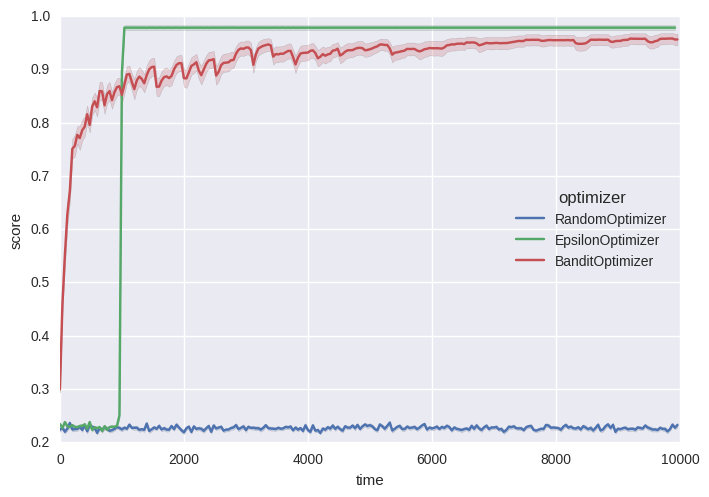

In [11]:
sns.set(style="darkgrid")

# Plot the response with standard error
sns.tsplot(data=data, time="time", unit="unit",
           condition="optimizer", value="score")